In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import datetime 
import statsmodels
import sklearn
import calendar 
import scipy



%matplotlib inline 

In [2]:
df=pd.read_csv('/root/Downloads/ritco_20180425.csv')

In [3]:
len(df)

1775076

In [4]:
print('sklearn: %s' % scipy.__version__)



sklearn: 0.18.1


In [5]:
df.head()


,101577,SAMU,NGARAMA-GICUMBI,05:00:00,2017-01-01 05:30:00,GR468C,2017-01-01 05:08:55,1700,MP220150900287,KAMUHANGIRE Fred,1,0,0.1,1.1
0,101578,JMV,NYABIMATA-NDAGO,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:14:23,800,MP220150900277,SHUMBUSHO JMV,1,0,0,1
1,101579,URAYENEZA,MUNINI-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:14:46,1200,MP220150900014,MUNYAMPUNDU VENUSTE,1,0,0,1
2,101580,IMACLE,MUNINI-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:15:33,1200,MP220150900014,MUNYAMPUNDU VENUSTE,1,0,0,1
3,101581,GEDAHEZ,NYABIMATA-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:15:55,1700,MP220150900277,SHUMBUSHO JMV,1,0,0,1
4,101582,IRIDEFOSE,MUNINI-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:16:57,1200,MP220150900014,MUNYAMPUNDU VENUSTE,1,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775076 entries, 0 to 1775075
Data columns (total 14 columns):
101577                 int64
SAMU                   object
NGARAMA-GICUMBI        object
05:00:00               object
2017-01-01 05:30:00    object
GR468C                 object
2017-01-01 05:08:55    object
1700                   int64
MP220150900287         object
KAMUHANGIRE Fred       object
1                      int64
0                      int64
0.1                    int64
1.1                    int64
dtypes: int64(6), object(8)
memory usage: 189.6+ MB


In [7]:
df.head()


,101577,SAMU,NGARAMA-GICUMBI,05:00:00,2017-01-01 05:30:00,GR468C,2017-01-01 05:08:55,1700,MP220150900287,KAMUHANGIRE Fred,1,0,0.1,1.1
0,101578,JMV,NYABIMATA-NDAGO,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:14:23,800,MP220150900277,SHUMBUSHO JMV,1,0,0,1
1,101579,URAYENEZA,MUNINI-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:14:46,1200,MP220150900014,MUNYAMPUNDU VENUSTE,1,0,0,1
2,101580,IMACLE,MUNINI-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:15:33,1200,MP220150900014,MUNYAMPUNDU VENUSTE,1,0,0,1
3,101581,GEDAHEZ,NYABIMATA-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:15:55,1700,MP220150900277,SHUMBUSHO JMV,1,0,0,1
4,101582,IRIDEFOSE,MUNINI-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:16:57,1200,MP220150900014,MUNYAMPUNDU VENUSTE,1,0,0,1


In [8]:
df2 = ~(df["NGARAMA-GICUMBI"].str.contains("-"))

In [9]:
df2.count()


1775076

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775076 entries, 0 to 1775075
Data columns (total 14 columns):
101577                 int64
SAMU                   object
NGARAMA-GICUMBI        object
05:00:00               object
2017-01-01 05:30:00    object
GR468C                 object
2017-01-01 05:08:55    object
1700                   int64
MP220150900287         object
KAMUHANGIRE Fred       object
1                      int64
0                      int64
0.1                    int64
1.1                    int64
dtypes: int64(6), object(8)
memory usage: 189.6+ MB


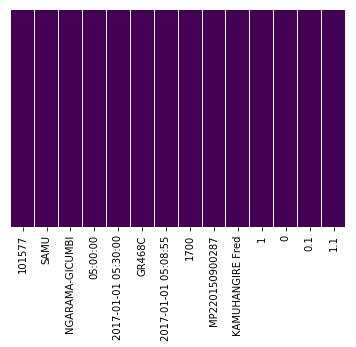

In [11]:
sns.heatmap((df.isnull()),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
df.columns


Index(['101577', 'SAMU', 'NGARAMA-GICUMBI', '05:00:00', '2017-01-01 05:30:00',
       'GR468C', '2017-01-01 05:08:55', '1700', 'MP220150900287',
       'KAMUHANGIRE Fred', '1', '0', '0.1', '1.1'],
      dtype='object')

In [13]:
old_names = ['2017-01-01 05:08:55'] 
new_names = ['TimeStamp']
df.rename(columns=dict(zip(old_names, new_names)), inplace=True)


In [14]:
old_names = ['101577','SAMU'] 
new_names = ['TicketNo','Client']
df.rename(columns=dict(zip(old_names, new_names)), inplace=True)


In [15]:
df.columns

Index(['TicketNo', 'Client', 'NGARAMA-GICUMBI', '05:00:00',
       '2017-01-01 05:30:00', 'GR468C', 'TimeStamp', '1700', 'MP220150900287',
       'KAMUHANGIRE Fred', '1', '0', '0.1', '1.1'],
      dtype='object')

In [16]:
old_names = ['NGARAMA-GICUMBI','05:00:00','GR468C','Fare','KAMUHANGIRE Fred'] 
new_names = ['Route','TimeofRoute','PlateNo','1700','AgentName',]
df.rename(columns=dict(zip(old_names, new_names)), inplace=True)


In [17]:
df.columns

Index(['TicketNo', 'Client', 'Route', 'TimeofRoute', '2017-01-01 05:30:00',
       'PlateNo', 'TimeStamp', '1700', 'MP220150900287', 'AgentName', '1', '0',
       '0.1', '1.1'],
      dtype='object')

In [18]:
df.head()


,TicketNo,Client,Route,TimeofRoute,2017-01-01 05:30:00,PlateNo,TimeStamp,1700,MP220150900287,AgentName,1,0,0.1,1.1
0,101578,JMV,NYABIMATA-NDAGO,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:14:23,800,MP220150900277,SHUMBUSHO JMV,1,0,0,1
1,101579,URAYENEZA,MUNINI-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:14:46,1200,MP220150900014,MUNYAMPUNDU VENUSTE,1,0,0,1
2,101580,IMACLE,MUNINI-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:15:33,1200,MP220150900014,MUNYAMPUNDU VENUSTE,1,0,0,1
3,101581,GEDAHEZ,NYABIMATA-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:15:55,1700,MP220150900277,SHUMBUSHO JMV,1,0,0,1
4,101582,IRIDEFOSE,MUNINI-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:16:57,1200,MP220150900014,MUNYAMPUNDU VENUSTE,1,0,0,1


In [19]:
old_names = ['1700'] 
new_names = ['Fare']
df.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [20]:
df.columns


Index(['TicketNo', 'Client', 'Route', 'TimeofRoute', '2017-01-01 05:30:00',
       'PlateNo', 'TimeStamp', 'Fare', 'MP220150900287', 'AgentName', '1', '0',
       '0.1', '1.1'],
      dtype='object')

In [21]:
old_names = ['2017-01-01 05:30:00'] 
new_names = ['TimeStampOfRoute']
df.rename(columns=dict(zip(old_names, new_names)), inplace=True)
             

In [22]:
df.columns


Index(['TicketNo', 'Client', 'Route', 'TimeofRoute', 'TimeStampOfRoute',
       'PlateNo', 'TimeStamp', 'Fare', 'MP220150900287', 'AgentName', '1', '0',
       '0.1', '1.1'],
      dtype='object')

In [23]:
old_names = ['TimeStamp'] 
new_names = ['TimeStampOfTicket']
df.rename(columns=dict(zip(old_names, new_names)), inplace=True)

             

In [24]:

df.columns



Index(['TicketNo', 'Client', 'Route', 'TimeofRoute', 'TimeStampOfRoute',
       'PlateNo', 'TimeStampOfTicket', 'Fare', 'MP220150900287', 'AgentName',
       '1', '0', '0.1', '1.1'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775076 entries, 0 to 1775075
Data columns (total 14 columns):
TicketNo             int64
Client               object
Route                object
TimeofRoute          object
TimeStampOfRoute     object
PlateNo              object
TimeStampOfTicket    object
Fare                 int64
MP220150900287       object
AgentName            object
1                    int64
0                    int64
0.1                  int64
1.1                  int64
dtypes: int64(6), object(8)
memory usage: 189.6+ MB


In [26]:
old_names = ['MP220150900287'] 
new_names = ['POSMachine']
df.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [27]:
df.columns


Index(['TicketNo', 'Client', 'Route', 'TimeofRoute', 'TimeStampOfRoute',
       'PlateNo', 'TimeStampOfTicket', 'Fare', 'POSMachine', 'AgentName', '1',
       '0', '0.1', '1.1'],
      dtype='object')

In [28]:
df.head()

,TicketNo,Client,Route,TimeofRoute,TimeStampOfRoute,PlateNo,TimeStampOfTicket,Fare,POSMachine,AgentName,1,0,0.1,1.1
0,101578,JMV,NYABIMATA-NDAGO,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:14:23,800,MP220150900277,SHUMBUSHO JMV,1,0,0,1
1,101579,URAYENEZA,MUNINI-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:14:46,1200,MP220150900014,MUNYAMPUNDU VENUSTE,1,0,0,1
2,101580,IMACLE,MUNINI-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:15:33,1200,MP220150900014,MUNYAMPUNDU VENUSTE,1,0,0,1
3,101581,GEDAHEZ,NYABIMATA-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:15:55,1700,MP220150900277,SHUMBUSHO JMV,1,0,0,1
4,101582,IRIDEFOSE,MUNINI-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:16:57,1200,MP220150900014,MUNYAMPUNDU VENUSTE,1,0,0,1


In [29]:
df["TimeStampOfTicket"]=pd.to_datetime(df.TimeStampOfTicket)

In [30]:
df.tail()

,TicketNo,Client,Route,TimeofRoute,TimeStampOfRoute,PlateNo,TimeStampOfTicket,Fare,POSMachine,AgentName,1,0,0.1,1.1
1775071,3022584,SAMU,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:16:03,1180,IMEI359128046011793,INGABIRE NADIA,1,0,0,1
1775072,3022587,EDMOND,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:17:46,1180,IMEI359128046011793,INGABIRE NADIA,1,0,0,1
1775073,3022588,EDMOND,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:18:01,1180,IMEI359128046011793,INGABIRE NADIA,1,0,0,1
1775074,3022590,ALLY,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:19:25,1180,IMEI359128046011793,INGABIRE NADIA,1,0,0,1
1775075,3022645,ANJE,BUMAZI-KIGALI,14:00:00,2017-12-31 14:00:00,RAD204K,2017-12-31 21:54:05,4000,MP220150900325,SIBOMANA Aimable,1,0,0,1


In [31]:
df.dtypes

TicketNo                      int64
Client                       object
Route                        object
TimeofRoute                  object
TimeStampOfRoute             object
PlateNo                      object
TimeStampOfTicket    datetime64[ns]
Fare                          int64
POSMachine                   object
AgentName                    object
1                             int64
0                             int64
0.1                           int64
1.1                           int64
dtype: object

In [32]:
df["TimeStampOfRoute"]=pd.to_datetime(df.TimeStampOfRoute, errors='ignore')


In [33]:
df.dtypes

TicketNo                      int64
Client                       object
Route                        object
TimeofRoute                  object
TimeStampOfRoute             object
PlateNo                      object
TimeStampOfTicket    datetime64[ns]
Fare                          int64
POSMachine                   object
AgentName                    object
1                             int64
0                             int64
0.1                           int64
1.1                           int64
dtype: object

In [34]:
df.head()

,TicketNo,Client,Route,TimeofRoute,TimeStampOfRoute,PlateNo,TimeStampOfTicket,Fare,POSMachine,AgentName,1,0,0.1,1.1
0,101578,JMV,NYABIMATA-NDAGO,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:14:23,800,MP220150900277,SHUMBUSHO JMV,1,0,0,1
1,101579,URAYENEZA,MUNINI-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:14:46,1200,MP220150900014,MUNYAMPUNDU VENUSTE,1,0,0,1
2,101580,IMACLE,MUNINI-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:15:33,1200,MP220150900014,MUNYAMPUNDU VENUSTE,1,0,0,1
3,101581,GEDAHEZ,NYABIMATA-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:15:55,1700,MP220150900277,SHUMBUSHO JMV,1,0,0,1
4,101582,IRIDEFOSE,MUNINI-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:16:57,1200,MP220150900014,MUNYAMPUNDU VENUSTE,1,0,0,1


In [35]:
df.dtypes

TicketNo                      int64
Client                       object
Route                        object
TimeofRoute                  object
TimeStampOfRoute             object
PlateNo                      object
TimeStampOfTicket    datetime64[ns]
Fare                          int64
POSMachine                   object
AgentName                    object
1                             int64
0                             int64
0.1                           int64
1.1                           int64
dtype: object

In [36]:
df.head(2)

,TicketNo,Client,Route,TimeofRoute,TimeStampOfRoute,PlateNo,TimeStampOfTicket,Fare,POSMachine,AgentName,1,0,0.1,1.1
0,101578,JMV,NYABIMATA-NDAGO,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:14:23,800,MP220150900277,SHUMBUSHO JMV,1,0,0,1
1,101579,URAYENEZA,MUNINI-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:14:46,1200,MP220150900014,MUNYAMPUNDU VENUSTE,1,0,0,1


In [37]:
df2=~(df["TimeofRoute"].str.contains("00"))

In [38]:
df2.count()

1775076

In [39]:
df['NumericalMonth']=df.TimeStampOfTicket.dt.month

In [40]:

df.tail(2)

,TicketNo,Client,Route,TimeofRoute,TimeStampOfRoute,PlateNo,TimeStampOfTicket,Fare,POSMachine,AgentName,1,0,0.1,1.1,NumericalMonth
1775074,3022590,ALLY,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:19:25,1180,IMEI359128046011793,INGABIRE NADIA,1,0,0,1,12
1775075,3022645,ANJE,BUMAZI-KIGALI,14:00:00,2017-12-31 14:00:00,RAD204K,2017-12-31 21:54:05,4000,MP220150900325,SIBOMANA Aimable,1,0,0,1,12


In [41]:
df['StringMonth'] = df['NumericalMonth'].apply(lambda x: calendar.month_abbr[x])

In [42]:
df.tail()

,TicketNo,Client,Route,TimeofRoute,TimeStampOfRoute,PlateNo,TimeStampOfTicket,Fare,POSMachine,AgentName,1,0,0.1,1.1,NumericalMonth,StringMonth
1775071,3022584,SAMU,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:16:03,1180,IMEI359128046011793,INGABIRE NADIA,1,0,0,1,12,Dec
1775072,3022587,EDMOND,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:17:46,1180,IMEI359128046011793,INGABIRE NADIA,1,0,0,1,12,Dec
1775073,3022588,EDMOND,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:18:01,1180,IMEI359128046011793,INGABIRE NADIA,1,0,0,1,12,Dec
1775074,3022590,ALLY,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:19:25,1180,IMEI359128046011793,INGABIRE NADIA,1,0,0,1,12,Dec
1775075,3022645,ANJE,BUMAZI-KIGALI,14:00:00,2017-12-31 14:00:00,RAD204K,2017-12-31 21:54:05,4000,MP220150900325,SIBOMANA Aimable,1,0,0,1,12,Dec


In [43]:
df['WeekDay']= df.TimeStampOfTicket.dt.weekday_name

In [44]:
df.tail()

,TicketNo,Client,Route,TimeofRoute,TimeStampOfRoute,PlateNo,TimeStampOfTicket,Fare,POSMachine,AgentName,1,0,0.1,1.1,NumericalMonth,StringMonth,WeekDay
1775071,3022584,SAMU,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:16:03,1180,IMEI359128046011793,INGABIRE NADIA,1,0,0,1,12,Dec,Sunday
1775072,3022587,EDMOND,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:17:46,1180,IMEI359128046011793,INGABIRE NADIA,1,0,0,1,12,Dec,Sunday
1775073,3022588,EDMOND,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:18:01,1180,IMEI359128046011793,INGABIRE NADIA,1,0,0,1,12,Dec,Sunday
1775074,3022590,ALLY,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:19:25,1180,IMEI359128046011793,INGABIRE NADIA,1,0,0,1,12,Dec,Sunday
1775075,3022645,ANJE,BUMAZI-KIGALI,14:00:00,2017-12-31 14:00:00,RAD204K,2017-12-31 21:54:05,4000,MP220150900325,SIBOMANA Aimable,1,0,0,1,12,Dec,Sunday


In [45]:
df['WeekOfMonth']=df['TimeStampOfTicket'].apply(lambda d: (d.day-1) // 7 + 1)

In [46]:
df.tail()

,TicketNo,Client,Route,TimeofRoute,TimeStampOfRoute,PlateNo,TimeStampOfTicket,Fare,POSMachine,AgentName,1,0,0.1,1.1,NumericalMonth,StringMonth,WeekDay,WeekOfMonth
1775071,3022584,SAMU,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:16:03,1180,IMEI359128046011793,INGABIRE NADIA,1,0,0,1,12,Dec,Sunday,5
1775072,3022587,EDMOND,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:17:46,1180,IMEI359128046011793,INGABIRE NADIA,1,0,0,1,12,Dec,Sunday,5
1775073,3022588,EDMOND,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:18:01,1180,IMEI359128046011793,INGABIRE NADIA,1,0,0,1,12,Dec,Sunday,5
1775074,3022590,ALLY,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:19:25,1180,IMEI359128046011793,INGABIRE NADIA,1,0,0,1,12,Dec,Sunday,5
1775075,3022645,ANJE,BUMAZI-KIGALI,14:00:00,2017-12-31 14:00:00,RAD204K,2017-12-31 21:54:05,4000,MP220150900325,SIBOMANA Aimable,1,0,0,1,12,Dec,Sunday,5


In [47]:
df['Hour']=df.TimeStampOfTicket.dt.hour

In [48]:
df.tail()

,TicketNo,Client,Route,TimeofRoute,TimeStampOfRoute,PlateNo,TimeStampOfTicket,Fare,POSMachine,AgentName,1,0,0.1,1.1,NumericalMonth,StringMonth,WeekDay,WeekOfMonth,Hour
1775071,3022584,SAMU,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:16:03,1180,IMEI359128046011793,INGABIRE NADIA,1,0,0,1,12,Dec,Sunday,5,20
1775072,3022587,EDMOND,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:17:46,1180,IMEI359128046011793,INGABIRE NADIA,1,0,0,1,12,Dec,Sunday,5,20
1775073,3022588,EDMOND,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:18:01,1180,IMEI359128046011793,INGABIRE NADIA,1,0,0,1,12,Dec,Sunday,5,20
1775074,3022590,ALLY,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:19:25,1180,IMEI359128046011793,INGABIRE NADIA,1,0,0,1,12,Dec,Sunday,5,20
1775075,3022645,ANJE,BUMAZI-KIGALI,14:00:00,2017-12-31 14:00:00,RAD204K,2017-12-31 21:54:05,4000,MP220150900325,SIBOMANA Aimable,1,0,0,1,12,Dec,Sunday,5,21


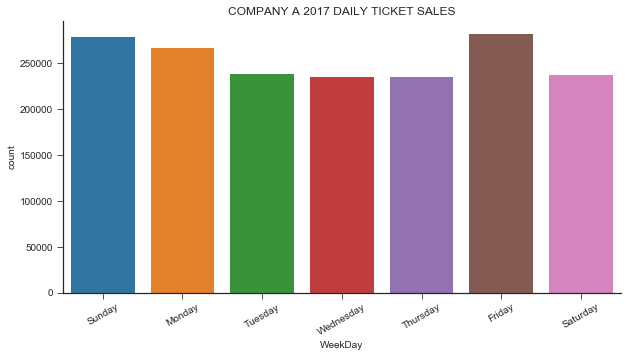

In [49]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 5)

ax=sns.countplot(x="WeekDay",data=df)
sns.despine()

ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
sns.set(font_scale = 1)
ax.set_title("COMPANY A 2017 DAILY TICKET SALES")
plt.show()
#plt.title('RITCO 2017 DAILY TICKET SALES')
#plt.show()
ax.set( ylabel='Number of Tickets')


total = df.WeekDay.count()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+2500,
            '{:1.1f}'.format((height/total)*100)+'%',
            ha="center") 
    
fig.savefig('RitcoWeekDay20172.png')

In [50]:
df.WeekDay.value_counts()

Friday       282049
Sunday       278831
Monday       266745
Tuesday      238881
Saturday     237419
Wednesday    235684
Thursday     235467
Name: WeekDay, dtype: int64

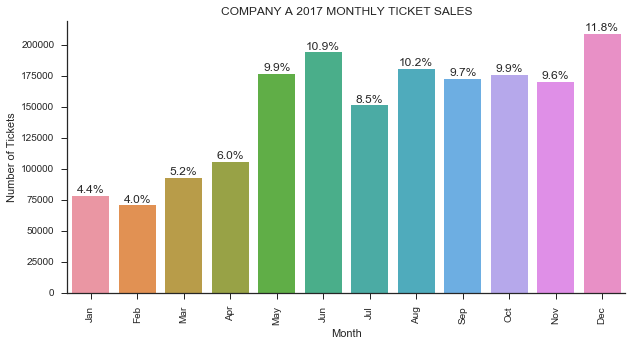

In [51]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 5)

sns.countplot(x="StringMonth",data=df)
sns.despine()

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 1)
plt.title('COMPANY A 2017 MONTHLY TICKET SALES')
ax.set( ylabel='Number of Tickets', xlabel="Month")

total = df.StringMonth.count()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+2500,
            '{:1.1f}'.format((height/total)*100)+'%',
            ha="center") 
    
fig.savefig('RitcoMonthly2017.png')    

In [52]:
df.StringMonth.value_counts()

Dec    208609
Jun    193655
Aug    180534
May    176527
Oct    175800
Sep    172416
Nov    169709
Jul    151014
Apr    105658
Mar     92741
Jan     77999
Feb     70414
Name: StringMonth, dtype: int64

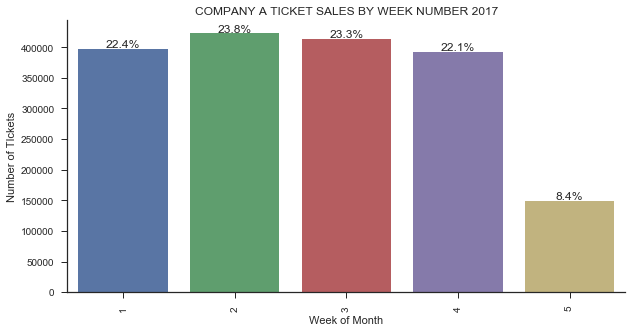

In [53]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 5)

sns.countplot(x="WeekOfMonth",data=df)
sns.despine()

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 1)
plt.title('COMPANY A TICKET SALES BY WEEK NUMBER 2017')
ax.set(ylabel="Number of TIckets", xlabel="Week of Month")

total = df.WeekOfMonth.count()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+2500,
            '{:1.1f}'.format((height/total)*100)+'%',
            ha="center") 
    
fig.savefig('RitcoWeekno2017.png')    

In [54]:
df.WeekOfMonth.value_counts()

2    422716
3    413125
1    397760
4    392269
5    149206
Name: WeekOfMonth, dtype: int64

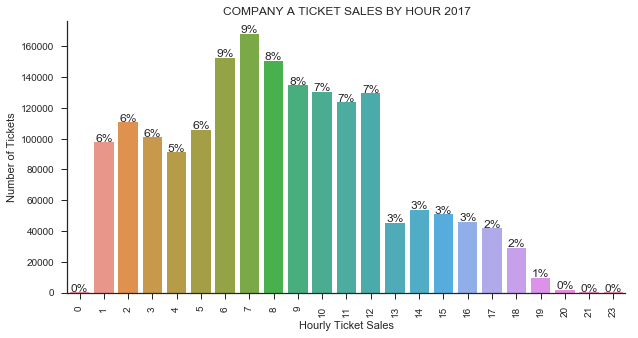

In [55]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 5)

sns.countplot(x="Hour",data=df)
sns.despine()

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 1)
plt.title('COMPANY A TICKET SALES BY HOUR 2017')
ax.set(ylabel="Number of Tickets",xlabel = "Hourly Ticket Sales" )

total = df.Hour.count()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+500 ,
            '{:1.0f}'.format((height/total)*100)+'%',
            ha="center") 

fig.savefig('RitcoHour2017.png')

In [56]:
df.Hour.value_counts()

7     168111
6     152445
8     150575
9     134531
10    130511
12    129471
11    123682
2     110531
5     105749
3     101132
1      97877
4      91358
14     53876
15     50799
16     45968
13     45446
17     41778
18     29107
19      9662
20      1883
0        403
21       160
23        21
Name: Hour, dtype: int64

In [57]:
df.Route.value_counts()

KIGALI-MUSANZE           135102
RUBAVU-KIGALI            113209
KIGALI-RUBAVU            112631
MUSANZE-KIGALI           101444
KIGALI-HUYE               66681
HUYE-KIGALI               60145
MUSANZE-RUBAVU            59934
RUBAVU-MUSANZE            50421
KIGALI-NGORORERO          44581
NGORORERO-KIGALI          35082
KIGALI-MUHANGA            27375
MUHANGA-KIGALI            24284
KIGALI-NYANZA             22172
KIBEHO-HUYE               19151
HUYE-KIBEHO               18901
MUHANGA-HUYE              18826
KIGALI-RUSIZI             17886
KIGALI-GATUNA             17867
HUYE-MUHANGA              14848
HUYE-RUGARIKA             13995
KIGALI-KARONGI            13859
KIGALI-NYAMASHEKE         12425
KIGALI-RWAMAGANA          12245
KIGALI-BIRAMBO            11840
KABARONDO-MURINDI         11800
BIRAMBO-KIGALI            10489
NGORORERO-MUHANGA         10431
GATUNA-KIGALI              9932
MURINDI-KABARONDO          9589
NDAGO-HUYE                 9350
                          ...  
CYONDO-M

In [58]:
df.Route.count()

1775076

In [59]:

sum(df['Fare'])

3115827866

In [60]:
Ta=df['Route'].value_counts()[df['Route'].value_counts()>3000]

In [61]:
sum(Ta)

1302163

In [62]:
dfRicto1 = df.groupby("Route").filter(lambda x: len(x) >8000)
dfRicto1.Route.value_counts()
dfRicto1.Route.count()
dfRicto1.Route.value_counts()




KIGALI-MUSANZE       135102
RUBAVU-KIGALI        113209
KIGALI-RUBAVU        112631
MUSANZE-KIGALI       101444
KIGALI-HUYE           66681
HUYE-KIGALI           60145
MUSANZE-RUBAVU        59934
RUBAVU-MUSANZE        50421
KIGALI-NGORORERO      44581
NGORORERO-KIGALI      35082
KIGALI-MUHANGA        27375
MUHANGA-KIGALI        24284
KIGALI-NYANZA         22172
KIBEHO-HUYE           19151
HUYE-KIBEHO           18901
MUHANGA-HUYE          18826
KIGALI-RUSIZI         17886
KIGALI-GATUNA         17867
HUYE-MUHANGA          14848
HUYE-RUGARIKA         13995
KIGALI-KARONGI        13859
KIGALI-NYAMASHEKE     12425
KIGALI-RWAMAGANA      12245
KIGALI-BIRAMBO        11840
KABARONDO-MURINDI     11800
BIRAMBO-KIGALI        10489
NGORORERO-MUHANGA     10431
GATUNA-KIGALI          9932
MURINDI-KABARONDO      9589
RUBAVU-BYANGABO        9350
NDAGO-HUYE             9350
BASE-MUSANZE           9230
ARRETTE-KIGALI         8813
HUYE-NDAGO             8809
KIGALI-KAYONZA         8801
KIGALI-GASEKE       

In [63]:
dfRicto1.Route.count()

1139755

In [64]:
df.Route.count()

1775076

In [65]:
df["Quarter"]= df.TimeStampOfTicket.dt.quarter

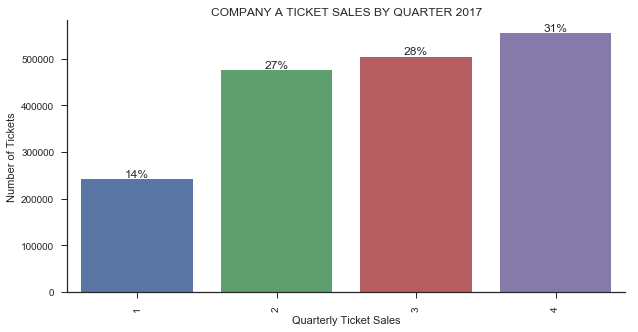

In [66]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 5)

sns.countplot(x="Quarter",data=df)
sns.despine()

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 1)
plt.title('COMPANY A TICKET SALES BY QUARTER 2017')
ax.set(ylabel="Number of Tickets",xlabel = "Quarterly Ticket Sales" )

total = df.Quarter.count()

for p in ax.patches:
    height = p.get_height()
    
    ax.text(p.get_x()+p.get_width()/2.,
            height+4500 ,
            '{:1.0f}'.format((height/total)*100)+'%',
            ha="center") 

fig.savefig('RitcoQuarter2017.png')

In [67]:
df.Quarter.value_counts()

4    554118
3    503964
2    475840
1    241154
Name: Quarter, dtype: int64

In [68]:
df.head(5)

,TicketNo,Client,Route,TimeofRoute,TimeStampOfRoute,PlateNo,TimeStampOfTicket,Fare,POSMachine,AgentName,1,0,0.1,1.1,NumericalMonth,StringMonth,WeekDay,WeekOfMonth,Hour,Quarter
0,101578,JMV,NYABIMATA-NDAGO,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:14:23,800,MP220150900277,SHUMBUSHO JMV,1,0,0,1,1,Jan,Sunday,1,5,1
1,101579,URAYENEZA,MUNINI-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:14:46,1200,MP220150900014,MUNYAMPUNDU VENUSTE,1,0,0,1,1,Jan,Sunday,1,5,1
2,101580,IMACLE,MUNINI-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:15:33,1200,MP220150900014,MUNYAMPUNDU VENUSTE,1,0,0,1,1,Jan,Sunday,1,5,1
3,101581,GEDAHEZ,NYABIMATA-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:15:55,1700,MP220150900277,SHUMBUSHO JMV,1,0,0,1,1,Jan,Sunday,1,5,1
4,101582,IRIDEFOSE,MUNINI-HUYE,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:16:57,1200,MP220150900014,MUNYAMPUNDU VENUSTE,1,0,0,1,1,Jan,Sunday,1,5,1


In [69]:
df.dtypes

TicketNo                      int64
Client                       object
Route                        object
TimeofRoute                  object
TimeStampOfRoute             object
PlateNo                      object
TimeStampOfTicket    datetime64[ns]
Fare                          int64
POSMachine                   object
AgentName                    object
1                             int64
0                             int64
0.1                           int64
1.1                           int64
NumericalMonth                int64
StringMonth                  object
WeekDay                      object
WeekOfMonth                   int64
Hour                          int64
Quarter                       int64
dtype: object

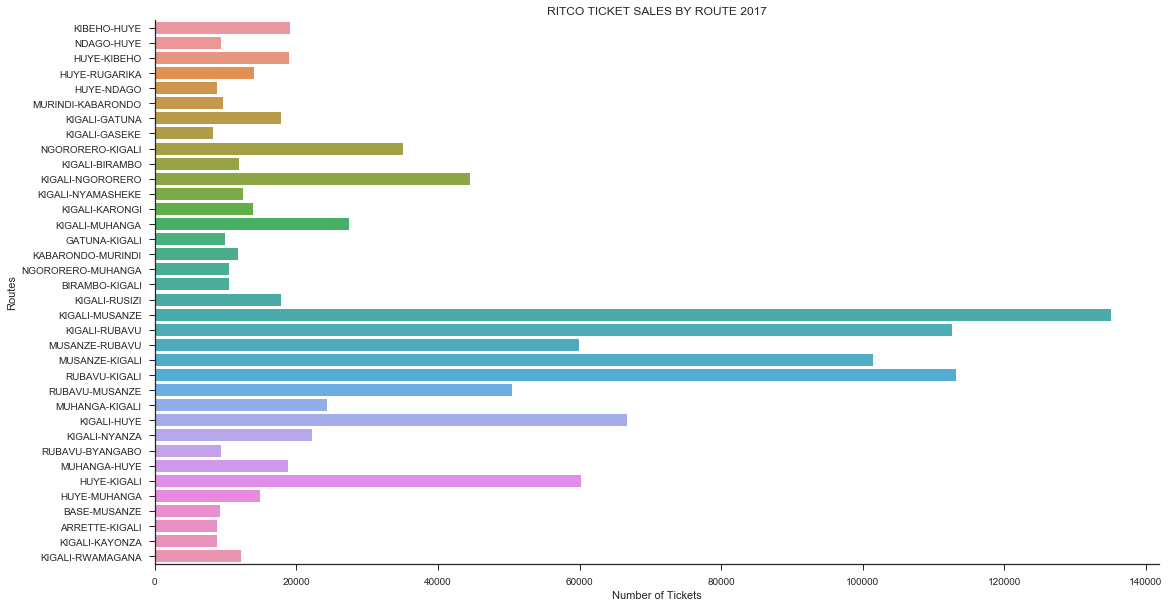

In [70]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(18, 10)

sns.countplot(y="Route",data=dfRicto1)
sns.despine()

#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 1)
plt.title('RITCO TICKET SALES BY ROUTE 2017')
ax.set(ylabel = "Routes", xlabel="Number of Tickets")

#total = dfRicto1.Route.count()

#for p in ax.patches:
 #   height = p.get_height()
 #   ax.text(p.get_x()+p.get_width()/2.,
    #        height+500 ,
    #        '{:1.0f}'.format((height/total)*100)+'%',
     #       ha="center") 
    
fig.savefig('RitcoRoute2017.png')

In [71]:
df['Minutes']= df.TimeStampOfTicket.dt.minute

In [72]:
df['DateofMonth']=df.TimeStampOfTicket.dt.day

In [73]:
df['Dateonly']=df.TimeStampOfTicket.dt.date

In [74]:
df['FreqDate']= df.groupby('Dateonly', as_index=False)['Dateonly'].transform(lambda s: s.count())


In [75]:
df.tail()

,TicketNo,Client,Route,TimeofRoute,TimeStampOfRoute,PlateNo,TimeStampOfTicket,Fare,POSMachine,AgentName,...,NumericalMonth,StringMonth,WeekDay,WeekOfMonth,Hour,Quarter,Minutes,DateofMonth,Dateonly,FreqDate
1775071,3022584,SAMU,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:16:03,1180,IMEI359128046011793,INGABIRE NADIA,...,12,Dec,Sunday,5,20,4,16,31,2017-12-31,7556
1775072,3022587,EDMOND,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:17:46,1180,IMEI359128046011793,INGABIRE NADIA,...,12,Dec,Sunday,5,20,4,17,31,2017-12-31,7556
1775073,3022588,EDMOND,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:18:01,1180,IMEI359128046011793,INGABIRE NADIA,...,12,Dec,Sunday,5,20,4,18,31,2017-12-31,7556
1775074,3022590,ALLY,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:19:25,1180,IMEI359128046011793,INGABIRE NADIA,...,12,Dec,Sunday,5,20,4,19,31,2017-12-31,7556
1775075,3022645,ANJE,BUMAZI-KIGALI,14:00:00,2017-12-31 14:00:00,RAD204K,2017-12-31 21:54:05,4000,MP220150900325,SIBOMANA Aimable,...,12,Dec,Sunday,5,21,4,54,31,2017-12-31,7556


In [76]:
df.tail()  #s.dt.date.value_counts()

,TicketNo,Client,Route,TimeofRoute,TimeStampOfRoute,PlateNo,TimeStampOfTicket,Fare,POSMachine,AgentName,...,NumericalMonth,StringMonth,WeekDay,WeekOfMonth,Hour,Quarter,Minutes,DateofMonth,Dateonly,FreqDate
1775071,3022584,SAMU,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:16:03,1180,IMEI359128046011793,INGABIRE NADIA,...,12,Dec,Sunday,5,20,4,16,31,2017-12-31,7556
1775072,3022587,EDMOND,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:17:46,1180,IMEI359128046011793,INGABIRE NADIA,...,12,Dec,Sunday,5,20,4,17,31,2017-12-31,7556
1775073,3022588,EDMOND,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:18:01,1180,IMEI359128046011793,INGABIRE NADIA,...,12,Dec,Sunday,5,20,4,18,31,2017-12-31,7556
1775074,3022590,ALLY,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:19:25,1180,IMEI359128046011793,INGABIRE NADIA,...,12,Dec,Sunday,5,20,4,19,31,2017-12-31,7556
1775075,3022645,ANJE,BUMAZI-KIGALI,14:00:00,2017-12-31 14:00:00,RAD204K,2017-12-31 21:54:05,4000,MP220150900325,SIBOMANA Aimable,...,12,Dec,Sunday,5,21,4,54,31,2017-12-31,7556


In [77]:
df.groupby('FreqDate')

In [78]:
df.tail()



,TicketNo,Client,Route,TimeofRoute,TimeStampOfRoute,PlateNo,TimeStampOfTicket,Fare,POSMachine,AgentName,...,NumericalMonth,StringMonth,WeekDay,WeekOfMonth,Hour,Quarter,Minutes,DateofMonth,Dateonly,FreqDate
1775071,3022584,SAMU,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:16:03,1180,IMEI359128046011793,INGABIRE NADIA,...,12,Dec,Sunday,5,20,4,16,31,2017-12-31,7556
1775072,3022587,EDMOND,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:17:46,1180,IMEI359128046011793,INGABIRE NADIA,...,12,Dec,Sunday,5,20,4,17,31,2017-12-31,7556
1775073,3022588,EDMOND,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:18:01,1180,IMEI359128046011793,INGABIRE NADIA,...,12,Dec,Sunday,5,20,4,18,31,2017-12-31,7556
1775074,3022590,ALLY,MUSANZE-RUBAVU,20:15:00,2017-12-31 20:15:00,RAD585J,2017-12-31 20:19:25,1180,IMEI359128046011793,INGABIRE NADIA,...,12,Dec,Sunday,5,20,4,19,31,2017-12-31,7556
1775075,3022645,ANJE,BUMAZI-KIGALI,14:00:00,2017-12-31 14:00:00,RAD204K,2017-12-31 21:54:05,4000,MP220150900325,SIBOMANA Aimable,...,12,Dec,Sunday,5,21,4,54,31,2017-12-31,7556


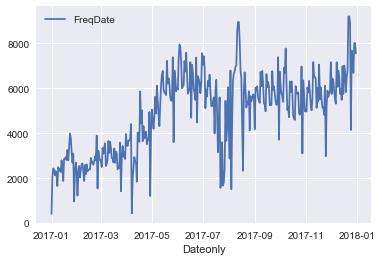

In [79]:
df.plot(x='Dateonly',y='FreqDate')


In [80]:
df3 = df.drop_duplicates(["Dateonly", "FreqDate"])

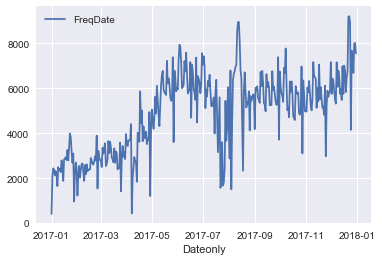

In [81]:

df3.plot(x='Dateonly',y='FreqDate')

In [82]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 1767520
Data columns (total 24 columns):
TicketNo             365 non-null int64
Client               365 non-null object
Route                365 non-null object
TimeofRoute          365 non-null object
TimeStampOfRoute     365 non-null object
PlateNo              365 non-null object
TimeStampOfTicket    365 non-null datetime64[ns]
Fare                 365 non-null int64
POSMachine           365 non-null object
AgentName            365 non-null object
1                    365 non-null int64
0                    365 non-null int64
0.1                  365 non-null int64
1.1                  365 non-null int64
NumericalMonth       365 non-null int64
StringMonth          365 non-null object
WeekDay              365 non-null object
WeekOfMonth          365 non-null int64
Hour                 365 non-null int64
Quarter              365 non-null int64
Minutes              365 non-null int64
DateofMonth          365 non-null

In [83]:
len(df3)

365

In [84]:
split_point = len(df3) - 31
dataset, validation = df3[0:split_point], df3[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')


Dataset 334, Validation 31


In [85]:
df3.columns

Index(['TicketNo', 'Client', 'Route', 'TimeofRoute', 'TimeStampOfRoute',
       'PlateNo', 'TimeStampOfTicket', 'Fare', 'POSMachine', 'AgentName', '1',
       '0', '0.1', '1.1', 'NumericalMonth', 'StringMonth', 'WeekDay',
       'WeekOfMonth', 'Hour', 'Quarter', 'Minutes', 'DateofMonth', 'Dateonly',
       'FreqDate'],
      dtype='object')

In [86]:
df3.head(3)

,TicketNo,Client,Route,TimeofRoute,TimeStampOfRoute,PlateNo,TimeStampOfTicket,Fare,POSMachine,AgentName,...,NumericalMonth,StringMonth,WeekDay,WeekOfMonth,Hour,Quarter,Minutes,DateofMonth,Dateonly,FreqDate
0,101578,JMV,NYABIMATA-NDAGO,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:14:23,800,MP220150900277,SHUMBUSHO JMV,...,1,Jan,Sunday,1,5,1,14,1,2017-01-01,411
411,102677,VIYATER,NYABIMATA-HUYE,06:00:00,2017-01-02 06:00:00,GR817C,2017-01-02 04:56:11,1700,MP220150900277,SHUMBUSHO JMV,...,1,Jan,Monday,1,4,1,56,2,2017-01-02,2042
2453,105609,THOMAS,NGARAMA-GICUMBI,16:00:00,2017-01-03 05:00:00,GR468C,2017-01-03 04:46:24,1700,MP220150900287,AFRICA Alfred,...,1,Jan,Tuesday,1,4,1,46,3,2017-01-03,2435


In [87]:
df3.head()

,TicketNo,Client,Route,TimeofRoute,TimeStampOfRoute,PlateNo,TimeStampOfTicket,Fare,POSMachine,AgentName,...,NumericalMonth,StringMonth,WeekDay,WeekOfMonth,Hour,Quarter,Minutes,DateofMonth,Dateonly,FreqDate
0,101578,JMV,NYABIMATA-NDAGO,06:00:00,2017-01-01 06:00:00,GR827C,2017-01-01 05:14:23,800,MP220150900277,SHUMBUSHO JMV,...,1,Jan,Sunday,1,5,1,14,1,2017-01-01,411
411,102677,VIYATER,NYABIMATA-HUYE,06:00:00,2017-01-02 06:00:00,GR817C,2017-01-02 04:56:11,1700,MP220150900277,SHUMBUSHO JMV,...,1,Jan,Monday,1,4,1,56,2,2017-01-02,2042
2453,105609,THOMAS,NGARAMA-GICUMBI,16:00:00,2017-01-03 05:00:00,GR468C,2017-01-03 04:46:24,1700,MP220150900287,AFRICA Alfred,...,1,Jan,Tuesday,1,4,1,46,3,2017-01-03,2435
4888,108855,VARATIN,NYABIMATA-HUYE,06:00:00,2017-01-04 06:00:00,GR800C,2017-01-04 05:01:34,1700,MP220150900277,SHUMBUSHO JMV,...,1,Jan,Wednesday,1,5,1,1,4,2017-01-04,2386
7274,112030,VESTINE,NGARAMA-GICUMBI,06:30:00,2017-01-05 06:00:00,GR468C,2017-01-05 04:50:40,1700,MP220150900287,AFRICA Alfred,...,1,Jan,Thursday,1,4,1,50,5,2017-01-05,2134


In [88]:
df4 = df3[['Dateonly','FreqDate']]

In [89]:
df4.head()

,Dateonly,FreqDate
0,2017-01-01,411
411,2017-01-02,2042
2453,2017-01-03,2435
4888,2017-01-04,2386
7274,2017-01-05,2134


In [90]:
df4.set_index('Dateonly')

,FreqDate
Dateonly,
2017-01-01,411
2017-01-02,2042
2017-01-03,2435
2017-01-04,2386
2017-01-05,2134
2017-01-06,2314
2017-01-07,2099
2017-01-08,1647
2017-01-09,2490


In [110]:
df4.set_index(pd.to_datetime(df4.Dateonly), inplace=True, drop=True)

In [111]:
df4.dtypes


Dateonly    object
FreqDate     int64
dtype: object

In [112]:
df4.head()

,Dateonly,FreqDate
Dateonly,,
2017-01-01,2017-01-01,411
2017-01-02,2017-01-02,2042
2017-01-03,2017-01-03,2435
2017-01-04,2017-01-04,2386
2017-01-05,2017-01-05,2134


In [113]:
del df4['Dateonly']

In [115]:
df4.head()

,FreqDate
Dateonly,
2017-01-01,411
2017-01-02,2042
2017-01-03,2435
2017-01-04,2386
2017-01-05,2134


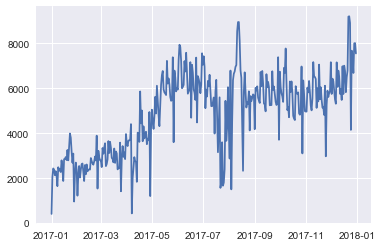

In [117]:
plt.plot(df4)

In [153]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=7)
    rolstd = pd.rolling_std(timeseries, window=7)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['difference'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput) 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=7).mean()
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=7).std()
  


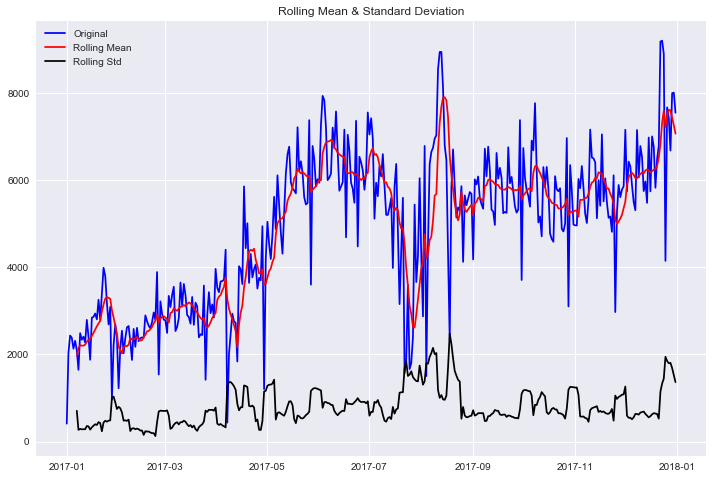

Results of Dickey-Fuller Test:
Test Statistic                  -1.796755
p-value                          0.382074
#Lags Used                      14.000000
Number of Observations Used    350.000000
Critical Value (5%)             -2.869833
Critical Value (10%)            -2.571188
Critical Value (1%)             -3.449173
dtype: float64


In [148]:
df4['difference'] = df4['FreqDate']-df4['FreqDate'].shift(7)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [151]:
df4.dropna(inplace=False).head()

,FreqDate,difference
Dateonly,,
2017-01-08,1647,1236.0
2017-01-09,2490,448.0
2017-01-10,2340,-95.0
2017-01-11,2409,23.0
2017-01-12,2274,140.0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=7).mean()
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=7).std()
  


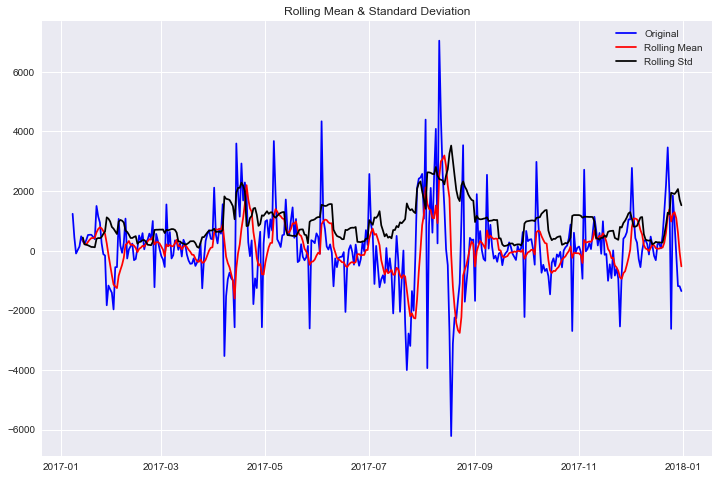

Results of Dickey-Fuller Test:


KeyError: 'difference'

In [155]:
test_stationarity(df4['difference'])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=7).mean()
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=7).std()
  


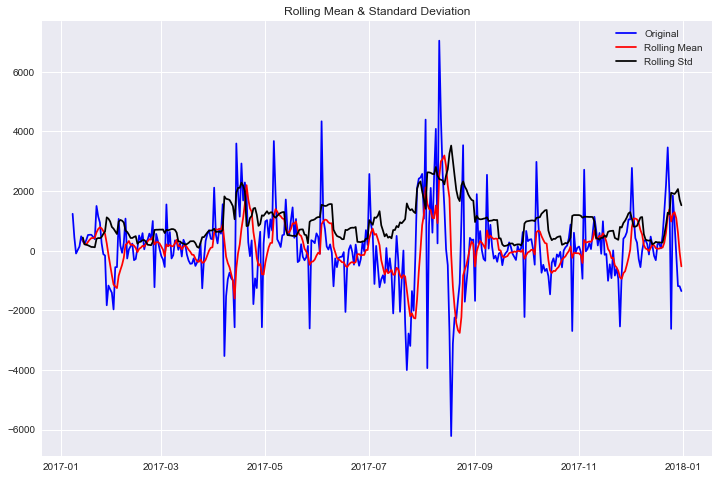

Results of Dickey-Fuller Test:


KeyError: 'FreqDate'

In [147]:
test_stationarity(df4.difference.dropna(inplace=False))

In [145]:
df4['difference']

Dateonly
2017-01-01       NaN
2017-01-02       NaN
2017-01-03       NaN
2017-01-04       NaN
2017-01-05       NaN
2017-01-06       NaN
2017-01-07       NaN
2017-01-08    1236.0
2017-01-09     448.0
2017-01-10     -95.0
2017-01-11      23.0
2017-01-12     140.0
2017-01-13     482.0
2017-01-14     310.0
2017-01-15     231.0
2017-01-16     356.0
2017-01-17     526.0
2017-01-18     533.0
2017-01-19     533.0
2017-01-20     463.0
2017-01-21     386.0
2017-01-22    1500.0
2017-01-23    1147.0
2017-01-24     940.0
2017-01-25     252.0
2017-01-26    -117.0
2017-01-27    -163.0
2017-01-28   -1832.0
2017-01-29   -1170.0
2017-01-30   -1296.0
               ...  
2017-12-02    2775.0
2017-12-03    1163.0
2017-12-04     424.0
2017-12-05     269.0
2017-12-06    -285.0
2017-12-07    -552.0
2017-12-08      -6.0
2017-12-09     317.0
2017-12-10     359.0
2017-12-11     213.0
2017-12-12    -129.0
2017-12-13     473.0
2017-12-14     170.0
2017-12-15    -173.0
2017-12-16    -319.0
2017-12-17     220.0
2017

In [97]:
df.DateofMonth.value_counts()

3     62043
11    61538
10    61271
17    61240
13    60983
12    60512
24    60196
16    59893
15    59724
8     59703
14    59499
6     59496
20    59253
9     59210
23    59193
21    58936
19    58305
5     58110
22    57832
27    56617
30    56527
29    56008
28    55850
18    55774
26    55660
7     55489
2     55030
4     54288
1     53304
25    46921
31    36671
Name: DateofMonth, dtype: int64

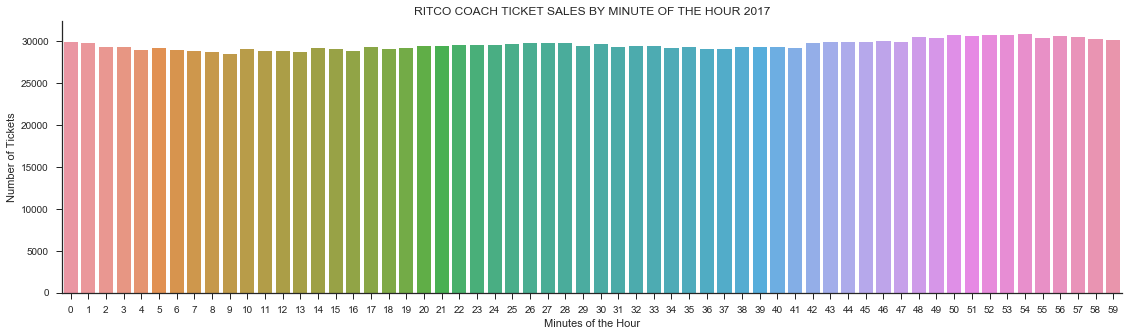

In [82]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(19, 5)

ax=sns.countplot(x="Minutes",data=df)
sns.despine()

ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
sns.set(font_scale = 1)
plt.title('RITCO COACH TICKET SALES BY MINUTE OF THE HOUR 2017')
total = df.Minutes.count()

#for p in ax.patches:
 #   height = p.get_height()
  #  ax.text(p.get_x()+p.get_width()/2.,
   #         height+300 ,
    #        '{:1.2f}'.format((height/total)*100),
     #       ha="center") 
    
ax.set(ylabel = "Number of Tickets", xlabel ="Minutes of the Hour")    
fig.savefig('RitcoMinutes2017.png') 

In [91]:
df.Minutes.count()

1775076

In [92]:
df.Minutes.value_counts()

54    30856
52    30740
50    30705
53    30676
51    30625
56    30624
57    30548
48    30522
55    30426
49    30358
58    30271
59    30148
46    30040
43    29953
45    29938
0     29937
44    29862
47    29856
42    29778
27    29768
1     29767
26    29752
28    29728
25    29714
30    29685
23    29546
24    29527
22    29479
21    29472
20    29448
29    29446
33    29446
32    29385
40    29353
2     29350
31    29350
39    29348
35    29325
38    29279
3     29268
17    29262
34    29238
5     29234
41    29227
19    29208
14    29135
15    29109
18    29095
37    29076
36    29069
10    29040
4     28924
6     28897
11    28879
16    28860
7     28846
12    28776
13    28709
8     28670
9     28523
Name: Minutes, dtype: int64

# Kcoach 2017


In [65]:
df2=pd.read_csv('/root/Downloads/kcoach_20180424.csv')


In [66]:
df2.head()


,1525365,JOSIANE,RUBAVU-MUSANZE,04h00,2017-01-01,RAD297I,2017-01-01 03:03:54,1180,225,GENTIL
0,1525366,RACHID,RUBAVU-KIGALI,04h00,2017-01-01,RAD297I,2017-01-01 03:06:13,3000,225,GENTIL
1,1525367,BINEZA,RUBAVU-MUSANZE,04h00,2017-01-01,RAD297I,2017-01-01 03:14:54,1180,225,GENTIL
2,1525368,JEANNE,RUBAVU-MUSANZE,04h00,2017-01-01,RAD297I,2017-01-01 03:15:10,1180,225,GENTIL
3,1525369,AIME,KIGALI-RUBAVU,05h15,2017-01-01,RAC458Y,2017-01-01 03:15:11,3000,230,Ntakirutimana Simon
4,1525370,VIANEY,KIGALI-RUBAVU,05h15,2017-01-01,RAC458Y,2017-01-01 03:15:47,3000,230,Ntakirutimana Simon


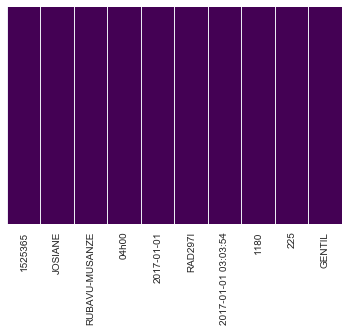

In [67]:
sns.heatmap((df2.isnull()),yticklabels=False,cbar=False,cmap='viridis')

In [68]:
df2.columns



Index(['1525365', 'JOSIANE', 'RUBAVU-MUSANZE', '04h00', '2017-01-01',
       'RAD297I', '2017-01-01 03:03:54', '1180', '225', 'GENTIL'],
      dtype='object')

In [69]:
old_names = ['1525365','JOSIANE','RUBAVU-MUSANZE','04h00','2017-01-01','RAD297I','2017-01-01 03:03:54','1180','225','GENTIL'] 
new_names = ['TicketNo','ClientName','Route','TimeofDeparture','Date','PlateNo','TimeStamp','Fare','POS','AgentName']

df2.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [70]:
df2.head()

,TicketNo,ClientName,Route,TimeofDeparture,Date,PlateNo,TimeStamp,Fare,POS,AgentName
0,1525366,RACHID,RUBAVU-KIGALI,04h00,2017-01-01,RAD297I,2017-01-01 03:06:13,3000,225,GENTIL
1,1525367,BINEZA,RUBAVU-MUSANZE,04h00,2017-01-01,RAD297I,2017-01-01 03:14:54,1180,225,GENTIL
2,1525368,JEANNE,RUBAVU-MUSANZE,04h00,2017-01-01,RAD297I,2017-01-01 03:15:10,1180,225,GENTIL
3,1525369,AIME,KIGALI-RUBAVU,05h15,2017-01-01,RAC458Y,2017-01-01 03:15:11,3000,230,Ntakirutimana Simon
4,1525370,VIANEY,KIGALI-RUBAVU,05h15,2017-01-01,RAC458Y,2017-01-01 03:15:47,3000,230,Ntakirutimana Simon


In [71]:
df2["TimeOfTicketSale"]=pd.to_datetime(df2.TimeStamp)

In [72]:
df2['Month']=df2.TimeOfTicketSale.dt.month

In [73]:
df2['Hour']=df2.TimeOfTicketSale.dt.hour

In [74]:
df2['Weekday']=df2.TimeOfTicketSale.dt.weekday_name

In [75]:
df2['WeekOfMonth']=df2['TimeOfTicketSale'].apply(lambda d: (d.day-1) // 7 + 1)

In [196]:
df2['StringMonth'] = df2['Month'].apply(lambda x: calendar.month_abbr[x])

In [197]:
df2['Quarterly']=df2.TimeOfTicketSale.dt.quarter

In [199]:
df2.head()

,TicketNo,ClientName,Route,TimeofDeparture,Date,PlateNo,TimeStamp,Fare,POS,AgentName,TimeOfTicketSale,Month,Hour,Weekday,WeekOfMonth,StringMonth,Minutes,Quarterly
0,1525366,RACHID,RUBAVU-KIGALI,04h00,2017-01-01,RAD297I,2017-01-01 03:06:13,3000,225,GENTIL,2017-01-01 03:06:13,1,3,Sunday,1,Jan,6,1
1,1525367,BINEZA,RUBAVU-MUSANZE,04h00,2017-01-01,RAD297I,2017-01-01 03:14:54,1180,225,GENTIL,2017-01-01 03:14:54,1,3,Sunday,1,Jan,14,1
2,1525368,JEANNE,RUBAVU-MUSANZE,04h00,2017-01-01,RAD297I,2017-01-01 03:15:10,1180,225,GENTIL,2017-01-01 03:15:10,1,3,Sunday,1,Jan,15,1
3,1525369,AIME,KIGALI-RUBAVU,05h15,2017-01-01,RAC458Y,2017-01-01 03:15:11,3000,230,Ntakirutimana Simon,2017-01-01 03:15:11,1,3,Sunday,1,Jan,15,1
4,1525370,VIANEY,KIGALI-RUBAVU,05h15,2017-01-01,RAC458Y,2017-01-01 03:15:47,3000,230,Ntakirutimana Simon,2017-01-01 03:15:47,1,3,Sunday,1,Jan,15,1


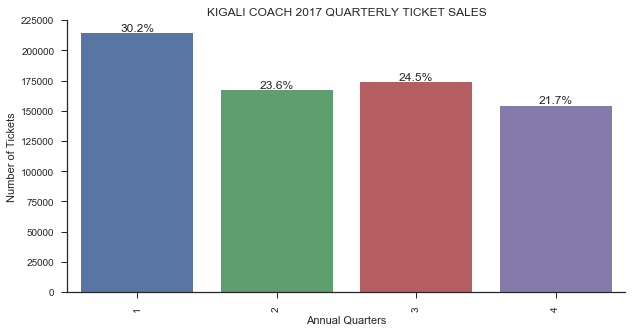

In [208]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 5)

sns.countplot(x="Quarterly",data=df2)
sns.despine()

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 1)
plt.title('KIGALI COACH 2017 QUARTERLY TICKET SALES')
ax.set(ylabel="Number of Tickets", xlabel="Annual Quarters")


total = df2.StringMonth.count()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+2000 ,
            '{:1.1f}'.format((height/total)*100)+'%',
            
            ha="center") 
fig.savefig('KigaliCoachQuarter2017.png')  

In [209]:
df2.Quarterly.value_counts()

1    214073
3    173705
2    167118
4    153989
Name: Quarterly, dtype: int64

In [205]:
sum(df2['Fare'])

1519927440

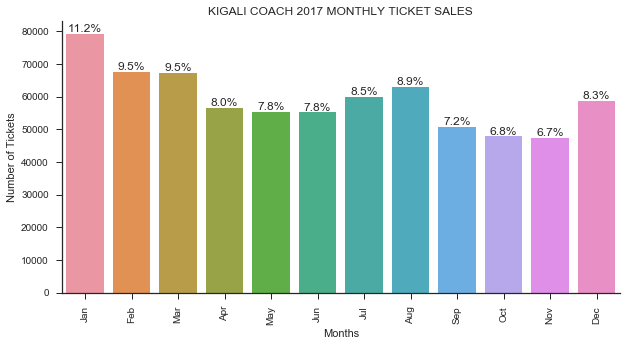

In [85]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 5)

sns.countplot(x="StringMonth",data=df2)
sns.despine()

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 1)
plt.title('KIGALI COACH 2017 MONTHLY TICKET SALES')
ax.set(ylabel="Number of Tickets", xlabel="Months")

total = df2.StringMonth.count()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+600 ,
            '{:1.1f}'.format((height/total)*100)+'%',
            ha="center") 
fig.savefig('KigaliCoachMonth2017.png')    

In [86]:
df2.StringMonth.value_counts()

Jan    79200
Feb    67486
Mar    67387
Aug    62910
Jul    60048
Dec    58781
Apr    56657
May    55269
Jun    55192
Sep    50747
Oct    47869
Nov    47339
Name: StringMonth, dtype: int64

In [87]:
sum(df2.StringMonth.value_counts())


708885

In [88]:
df2.StringMonth.count()

708885

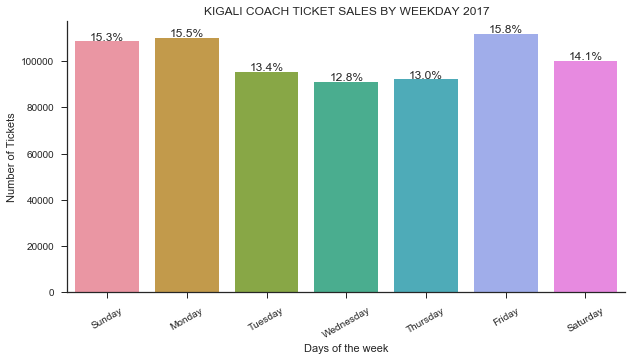

In [93]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 5)

sns.countplot(x="Weekday",data=df2)
sns.despine()

ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
sns.set(font_scale = 1)
plt.title('KIGALI COACH TICKET SALES BY WEEKDAY 2017')
ax.set(ylabel = "Number of Tickets", xlabel = "Days of the week")

total = df2.Weekday.count()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+600 ,
            '{:1.1f}'.format((height/total)*100)+'%',
            ha="center") 
    
fig.savefig('KigaliCoachWeekday2017.png')    

In [94]:
df2.Weekday.value_counts()

Friday       111902
Monday       110068
Sunday       108541
Saturday     100172
Tuesday       95171
Thursday      92073
Wednesday     90958
Name: Weekday, dtype: int64

In [95]:
df2.Weekday.count()

708885

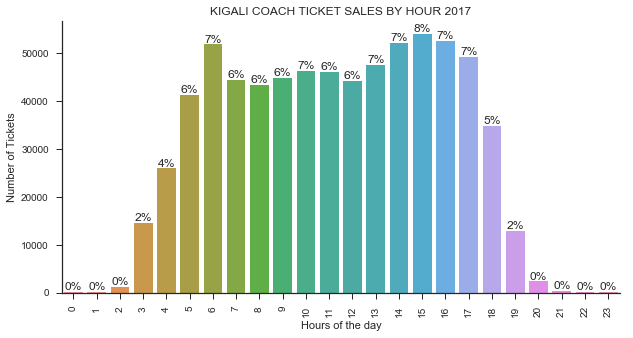

In [97]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 5)

sns.countplot(x="Hour",data=df2)
sns.despine()

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 1)
plt.title('KIGALI COACH TICKET SALES BY HOUR 2017')
ax.set(ylabel = "Number of Tickets", xlabel = "Hours of the day")

total = df2.Hour.count()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+500 ,
            '{:1.0f}'.format((height/total)*100)+'%',
            ha="center") 
    
fig.savefig('KigaliCoachHour2017.png')    

In [98]:
df2.Hour.value_counts()

15    54001
16    52407
14    52069
6     51755
17    49106
13    47501
10    46143
11    46055
9     44815
7     44361
12    44064
8     43266
5     41286
18    34838
4     25877
3     14490
19    12751
20     2315
2      1191
21      302
1       120
22       96
0        39
23       37
Name: Hour, dtype: int64

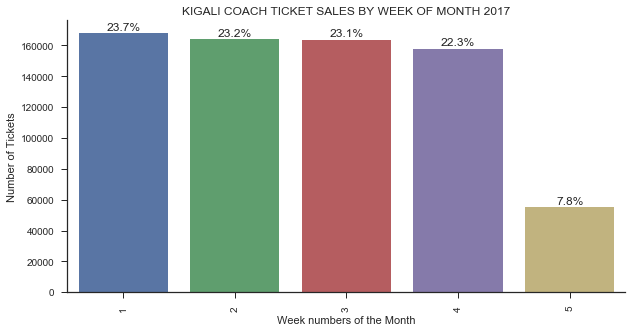

In [99]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 5)

ax=sns.countplot(x="WeekOfMonth",data=df2)
sns.despine()

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 1)
plt.title('KIGALI COACH TICKET SALES BY WEEK OF MONTH 2017')
total = df2.WeekOfMonth.count()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+2000 ,
            '{:1.1f}'.format((height/total)*100)+'%',
            ha="center") 
ax.set(ylabel = "Number of Tickets", xlabel ="Week numbers of the Month")    
fig.savefig('KigaliCoachWeekofMonth2017.png')    

In [100]:
df2.WeekOfMonth.value_counts()

1    167901
2    164167
3    163747
4    157902
5     55168
Name: WeekOfMonth, dtype: int64

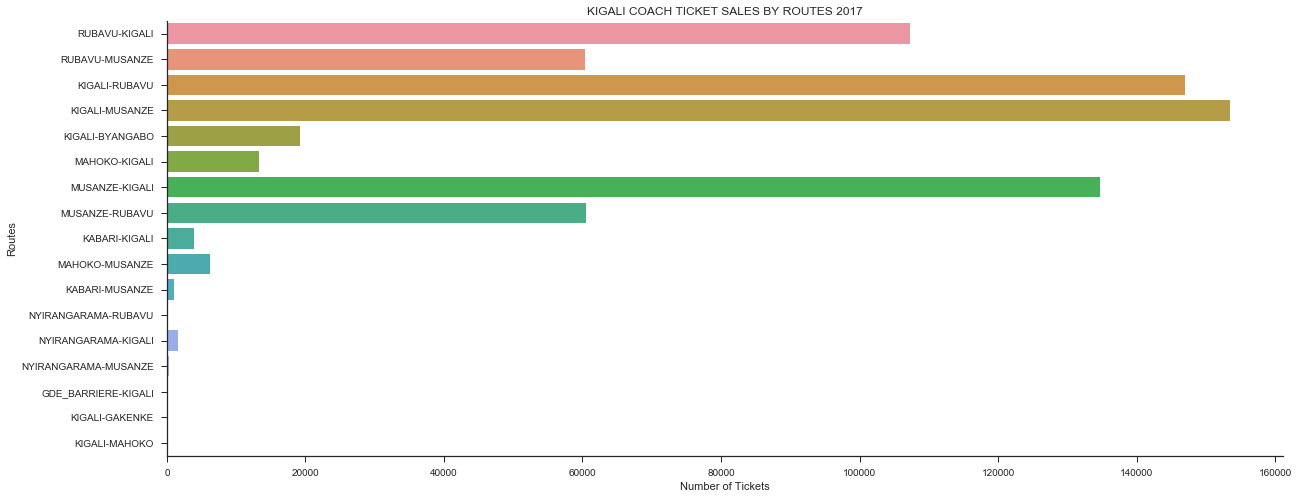

In [120]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 8)

ax=sns.countplot(y="Route",data=df2)
sns.despine()

#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(font_scale = 1)
plt.title('KIGALI COACH TICKET SALES BY ROUTES 2017')

#total = df2.WeekOfMonth.count()
#for p in ax.patches:
 #   height = p.get_height()
   # ax.text(p.get_x()+p.get_width()/2.,
        #    height+2000 ,
         #   '{:1.1f}'.format((height/total)*100)+'%',
           # ha="center") 
ax.set(ylabel = "Routes", xlabel="Number of Tickets")    
fig.savefig('KigaliCoachRoute2017.png') 

#order=df.groupby('channel').Id.sum().sort_values(ascending=False).index

In [139]:
df2.Route.value_counts()

KIGALI-MUSANZE          153466
KIGALI-RUBAVU           146948
MUSANZE-KIGALI          134692
RUBAVU-KIGALI           107284
MUSANZE-RUBAVU           60551
RUBAVU-MUSANZE           60339
KIGALI-BYANGABO          19163
MAHOKO-KIGALI            13345
MAHOKO-MUSANZE            6178
KABARI-KIGALI             3882
NYIRANGARAMA-KIGALI       1568
KABARI-MUSANZE            1040
NYIRANGARAMA-MUSANZE       224
NYIRANGARAMA-RUBAVU        170
KIGALI-GAKENKE              20
GDE_BARRIERE-KIGALI         11
KIGALI-MAHOKO                4
Name: Route, dtype: int64

In [151]:
df2["Minutes"]=df2.TimeOfTicketSale.dt.minute

In [152]:
df2.Minutes.value_counts()

3     12220
31    12218
2     12185
42    12185
1     12172
32    12159
47    12080
4     12061
6     12034
0     12007
35    11994
43    11982
34    11968
37    11960
46    11955
48    11945
33    11943
39    11942
54    11941
36    11920
44    11880
5     11879
8     11858
49    11856
59    11850
41    11841
55    11839
50    11830
40    11818
30    11812
38    11792
29    11767
18    11764
28    11760
17    11753
10    11739
7     11738
12    11712
45    11709
14    11703
21    11690
16    11684
53    11683
23    11682
58    11678
56    11645
57    11644
11    11643
51    11635
9     11622
27    11616
20    11601
26    11587
52    11576
24    11576
13    11564
15    11556
25    11547
19    11457
22    11428
Name: Minutes, dtype: int64

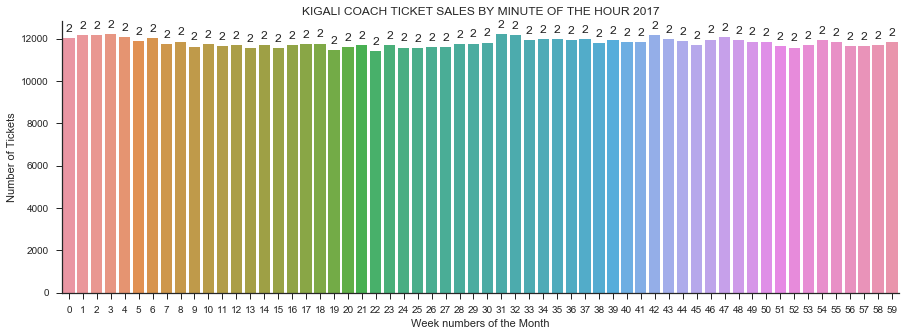

In [160]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 5)

ax=sns.countplot(x="Minutes",data=df2)
sns.despine()

ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
sns.set(font_scale = 1)
plt.title('KIGALI COACH TICKET SALES BY MINUTE OF THE HOUR 2017')
total = df2.Minutes.count()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+300 ,
            '{:1.0f}'.format((height/total)*100),
            ha="center") 
ax.set(ylabel = "Number of Tickets", xlabel ="Week numbers of the Month")    
fig.savefig('KigaliMinutes2017.png') 

In [162]:
df2.Minutes.value_counts()

3     12220
31    12218
2     12185
42    12185
1     12172
32    12159
47    12080
4     12061
6     12034
0     12007
35    11994
43    11982
34    11968
37    11960
46    11955
48    11945
33    11943
39    11942
54    11941
36    11920
44    11880
5     11879
8     11858
49    11856
59    11850
41    11841
55    11839
50    11830
40    11818
30    11812
38    11792
29    11767
18    11764
28    11760
17    11753
10    11739
7     11738
12    11712
45    11709
14    11703
21    11690
16    11684
53    11683
23    11682
58    11678
56    11645
57    11644
11    11643
51    11635
9     11622
27    11616
20    11601
26    11587
52    11576
24    11576
13    11564
15    11556
25    11547
19    11457
22    11428
Name: Minutes, dtype: int64